# Forecasting of global vertical market growth and changes in price of most common vertical farming crops

## Farming analysis budget and revenue

### Through research, an estimate of \\$1.52 per pound of produce annually in general is expected for growing costs over the span of years.



##### This analysis is carried out based on the results of the Houston Vertical Farm Case Study, with estimates based on consistent results and little repair and replacement to equipment.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
""" Crops to be grown in the Houston Vertical Farm:Tomatoes, Cucumbers and Lettuce
    Size of vertical farm: 562.5 sq ft to 1500 sq. ft
"""

""" low and high are the total yearly pounds of produce """

# The number is multipled by 2 because the specifiec location would have 2 floors dedicated to vertical farming

Tomato = 1.02  * (562.5 and 1500)
Tomato_low = 573.75
Tomato_high = 1530
Tomato_avg = ((Tomato_low + Tomato_high)/2) * 2

Lettuce = 19.62  * (562.5 and 1500) 
Lettuce_low = 11036.25
Lettuce_high =29430
Lettuce_avg = ((Lettuce_low + Lettuce_high)/2)*2

Cucumber = 31.42  * (562.5 and 1500) 
Cucumber_low = 17673
Cucumber_high = 47130
Cucumber_avg = ((Cucumber_low + Cucumber_high)/2) *2




""" from the second year onwards, there is an expected fee of $1.52 per pound annually
    where the cost breakdown is similar to the general breakdown of the budget.
"""

print(Tomato_avg, Lettuce_avg, Cucumber_avg)

2103.75 40466.25 64803.0


With the above total averages of annual pounds of produce, we are able to set a price and thus have an idea of expected revenue within the first year.

In [3]:
"""
Prices:
Tomato = $ 1.89 per pound
Lettuce = $ 2 per head , where a head is on average 1.5 pounds 
Cucumber = $ 1.30 per pound on average, and $ 0.5 per cucumber 
"""

#tomato
Tomato_yearly_revenue= Tomato_avg * 1.89


#lettuce
Lettuce_yearly_revenue = (Lettuce_avg/1.5)*2

#cucumber
Cucumber_yearly_revenue = Cucumber_avg * 1.3

print ("$",Tomato_yearly_revenue, "$",Lettuce_yearly_revenue, "$",Cucumber_yearly_revenue)
print( "The total revenue would be","$",(Tomato_yearly_revenue+Lettuce_yearly_revenue+Cucumber_yearly_revenue))

$ 3976.0874999999996 $ 53955.0 $ 84243.90000000001
The total revenue would be $ 142174.98750000002


In [6]:
tomato_price = pd.read_csv("Tomato_historical_price.csv").dropna()
lettuce_price = pd.read_csv("Lettuce_historical_data_complete.csv").dropna()
cucumber_price = pd.read_csv("Cucumber_historical_price.csv").dropna()

In [7]:
tomato_price.head(20)

,DATE,Price_($)
0,1980-01-01,0.703
1,1980-02-01,0.586
2,1980-03-01,0.642
3,1980-04-01,0.634
4,1980-05-01,0.737
5,1980-06-01,0.745
6,1980-07-01,0.683
7,1980-08-01,0.646
8,1980-09-01,0.679
9,1980-10-01,0.764


In [8]:
lettuce_price = lettuce_price.rename(columns = {"observation_date":"DATE"}).rename(columns = {"APU0000FL2101":"Price_($)"})
lettuce_price.tail(20)

,DATE,Price_($)
150,2018-07-01,2.056
151,2018-08-01,2.043
152,2018-09-01,2.058
153,2018-10-01,2.132
154,2018-11-01,2.170
155,2018-12-01,2.352
156,2019-01-01,2.177
157,2019-02-01,2.300
158,2019-03-01,2.356
159,2019-04-01,2.300


In [9]:
cucumber_price = cucumber_price.rename(columns = {"observation_date":"DATE"})
cucumber_price.shape

(231, 2)

In [10]:
# This code calculates the average yearly price of the crop between 1980 and 2021
tf = tomato_price.copy()

tf.DATE = pd.to_datetime(tomato_price.DATE, format = '%Y-%d-%M')
tf = tf.set_index(tf.DATE)
tf = tf.resample('Y').mean()
tf = tf.dropna()
tf.head(10)

,Price_($)
DATE,
1980-12-31,0.673667
1981-12-31,0.769833
1982-12-31,0.738667
1983-12-31,0.784500
1984-12-31,0.807333
1985-12-31,0.778167
1986-12-31,0.823750
1987-12-31,0.823100
1988-12-31,0.834083


[Text(0.5, 0, 'DATE'),
 Text(0, 0.5, 'Price ($)'),
 Text(0.5, 1.0, 'Graph showing the trend in prices per pound of Tomatoes between 1980 and 2021')]

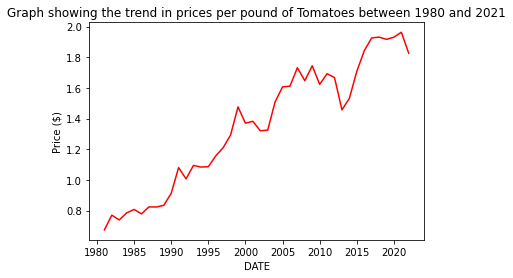

In [13]:
tf_plot = sns.lineplot(data=tf, x="DATE", y="Price_($)",color = "red",linewidth=1.5)
tf_plot.set(xlabel='DATE', ylabel='Price ($)',  title = "Graph showing the trend in prices per pound of Tomatoes between 1980 and 2021")

In [14]:
# This code calculates the average yearly price of the crop between 1980 and 2021
lf = lettuce_price.copy()
lf.DATE = pd.to_datetime(lettuce_price.DATE, format = '%Y-%m-%d')
lf = lf.set_index(lf.DATE)
lf = lf.drop("DATE", axis = 1)
lf = lf.resample('Y').mean()
lf = lf.dropna()
lf.head(10)

,Price_($)
DATE,
2006-12-31,1.393417
2007-12-31,1.570667
2008-12-31,1.710750
2009-12-31,1.755500
2010-12-31,1.792833
2011-12-31,1.780250
2012-12-31,1.518167
2013-12-31,1.711917
2014-12-31,1.693583


[Text(0.5, 0, 'DATE'),
 Text(0, 0.5, 'Price ($)'),
 Text(0.5, 1.0, 'Graph showing the trend in prices per pound of Lettuce between 2006 and 2021')]

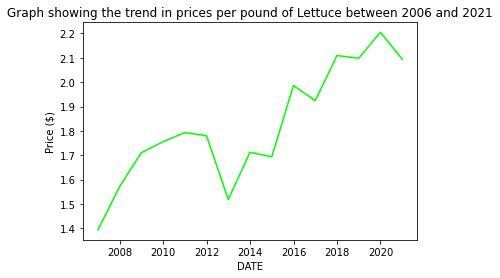

In [15]:
lf_plot = sns.lineplot(data=lf, x="DATE", y="Price_($)", color = "lime",linewidth=1.5)
lf_plot.set(xlabel='DATE', ylabel='Price ($)', title = "Graph showing the trend in prices per pound of Lettuce between 2006 and 2021")

In [16]:
# This code calculates the average yearly price of the crop between 1980 and 2021
cf = cucumber_price.copy()
cf.DATE = pd.to_datetime(cucumber_price.DATE, format = '%Y-%d-%M')
cf = cf.set_index(cf.DATE)
cf = cf.drop("DATE", axis = 1)
cf = cf.resample('Y').mean()
cf = cf.dropna()
cf.tail(10)

,Price_($)
DATE,
1991-12-31,0.654333
1992-12-31,0.669167
1993-12-31,0.622917
1994-12-31,0.603750
1995-12-31,0.693917
1996-12-31,0.704250
1997-12-31,0.657083
1998-12-31,0.903000
1999-12-31,0.858200


[Text(0.5, 0, 'DATE'),
 Text(0, 0.5, 'Price ($)'),
 Text(0.5, 1.0, 'Graph showing the trend in prices per pound of Cucumbers between 1980 and 2001')]

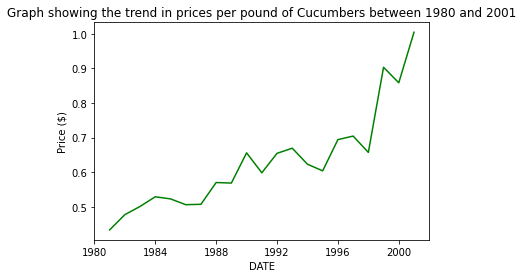

In [17]:
cf_plot = sns.lineplot(data=cf, x="DATE", y="Price_($)",color = "green",linewidth=1.5)
cf_plot.set(xlabel='DATE', ylabel='Price ($)', title = "Graph showing the trend in prices per pound of Cucumbers between 1980 and 2001")

In [18]:
tf.to_csv('tomato_price_update.csv')
lf.to_csv('lettuce_price_update.csv')
cf.to_csv('cucumber_price_update.csv')

### The following graphs show the forecast in price change for Tomatoes, Lettuce and Cucumbers by the pound until 2026 (using Tableau)

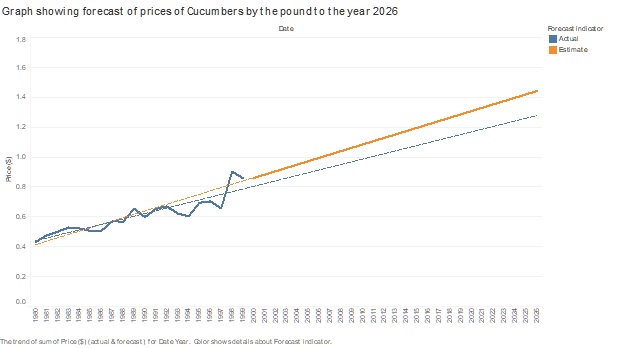
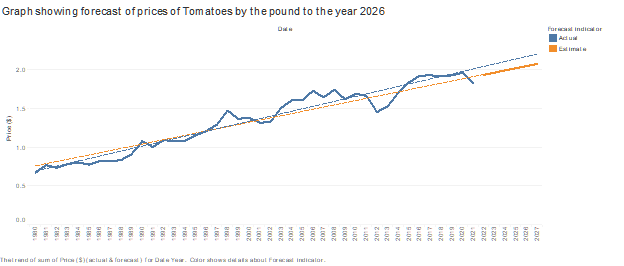
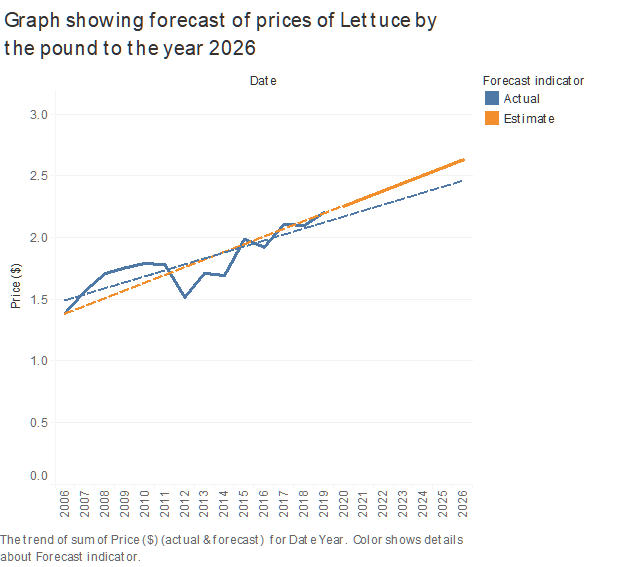

#### Using the above graphs, we can calculate the predicted change of income for the vertical farms based on the previous calculations to have a better ide of future profits

In [21]:
"""
Estimated prices of crops per pound;
Tomato: $2.051
Lettuce: $2.63
Cucumber: $1.443

We will use the same calculations as before for profits
"""

#tomato
Tomato_yearly_revenue= Tomato_avg * 2.051


#lettuce
Lettuce_yearly_revenue = (Lettuce_avg/1.5)*2.63

#cucumber
Cucumber_yearly_revenue = Cucumber_avg * 1.443

print ("$",Tomato_yearly_revenue, "$",Lettuce_yearly_revenue, "$",Cucumber_yearly_revenue)
print( "The total revenue would be","$",(Tomato_yearly_revenue+Lettuce_yearly_revenue+Cucumber_yearly_revenue))


$ 4314.79125 $ 70950.825 $ 93510.729
The total revenue would be $ 168776.34525


## Now we will forecast the growth of the vertical farming industry until 2026

####  The following values are obtained from a number of websites that did their own analyses. Using this, we can see the general trend of the global vertical farming growth and use it to forecast the data

In [22]:
value = {"2015":"1100000000","2016":"1400000000", "2017":"1720000000", "2018":"2230000000",
         "2019":"2970000000","2020":"3890000000","2021":"4810000000", "2022":"6310000000"}

df = pd.DataFrame(value.items(), columns=['Year', 'Market_value($)'])

df.Year = df.Year.astype(int).fillna(0.0)
df["Market_value($)"] = df["Market_value($)"].astype(float).fillna(0.0)

df.head()

,Year,Market_value($)
0,2015,1.100000e+09
1,2016,1.400000e+09
2,2017,1.720000e+09
3,2018,2.230000e+09
4,2019,2.970000e+09


Source:

https://towardsdatascience.com/python-vs-excel-compound-annual-growth-rate-cagr-c8dbad46d3e0

https://www.alliedmarketresearch.com/vertical-farming-market

https://www.prnewswire.com/news-releases/vertical-farming-market-size-worth-21-15-billion-by-2028--cagr-23-6-grand-view-research-inc-301268521.html

https://www.grandviewresearch.com/industry-analysis/vertical-farming-market

http://verticalfarm.altervista.org/the-global-vertical-farming-market-is-estimated-at-1-15-billion-2015-and-is-poised-to-reach-6-31-billion-by-2022-growing-at-cagr-of-27-5/?doing_wp_cron=1630911517.4567120075225830078125

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Market values ($ billion)'),
 Text(0.5, 1.0, 'Graph showing the growth of the vertical farming market between 2015 and 2022')]

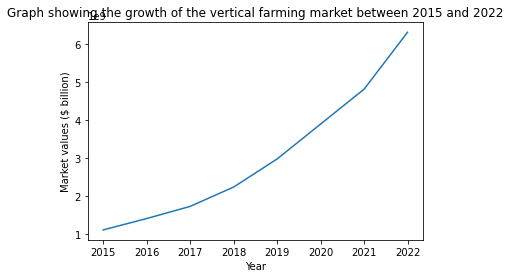

In [23]:
df_plot = sns.lineplot(data=df, x="Year", y="Market_value($)",linewidth=1.5)
df_plot.set(xlabel='Year', ylabel='Market values ($ billion)', title = "Graph showing the growth of the vertical farming market between 2015 and 2022")
#df_plot.legend_.remove()

In [24]:
df.to_csv('vf_market_growth.csv')

### Tableau graph for the market forecasting to the year 2026

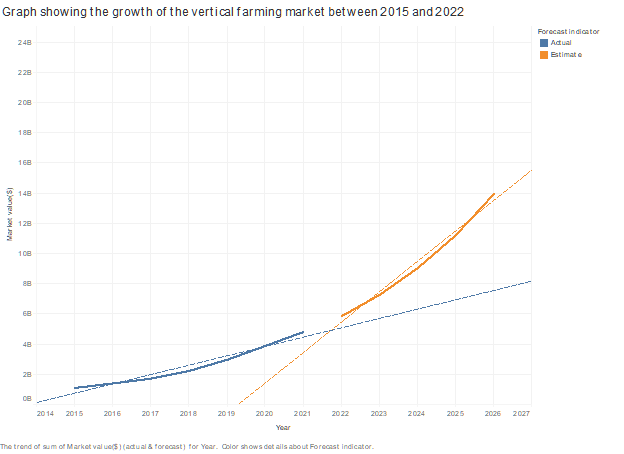